<h2 align="center"> Logistic Regression </h2>

### Task 2: Load the Data and Libraries
---

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
plt.style.use("ggplot")
%matplotlib inline

In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 12, 8

In [ ]:
df = pd.read_csv("DMV_Written_Tests.csv")
print(df.head())

   DMV_Test_1  DMV_Test_2  Results
0   34.623660   78.024693        0
1   30.286711   43.894998        0
2   35.847409   72.902198        0
3   60.182599   86.308552        1
4   79.032736   75.344376        1


In [ ]:
x=df[['DMV_Test_1', 'DMV_Test_2']]
y=df['Results']

   DMV_Test_1  DMV_Test_2
0   34.623660   78.024693
1   30.286711   43.894998
2   35.847409   72.902198
3   60.182599   86.308552
4   79.032736   75.344376


### Task 3: Visualize the Data
---

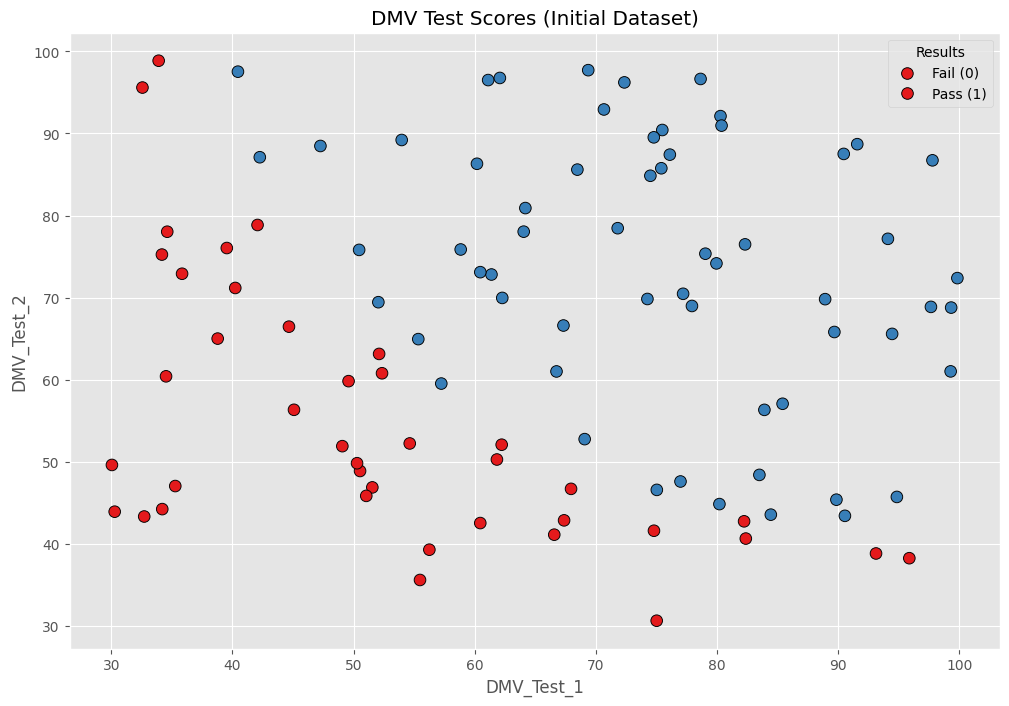

In [ ]:
sns.scatterplot(x=df['DMV_Test_1'],
                y=df['DMV_Test_2'],
                hue=df['Results'],
                palette="Set1",
                s=70,
                edgecolor="k")

plt.title("DMV Test Scores (Initial Dataset)")
plt.xlabel("DMV_Test_1")
plt.ylabel("DMV_Test_2")
plt.legend(title="Results", labels=["Fail (0)", "Pass (1)"])
plt.show()

### Task 4: Define the Logistic Sigmoid Function $\sigma(z)$
---

$$ \sigma(z) = \frac{1}{1+e^{-z}}$$

In [ ]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))


In [ ]:
z = 0.5
print("Sigmoid of", z, "is", sigmoid(z))

Sigmoid of 0.5 is 0.6224593312018546


### Task 5: Compute the Cost Function $J(\theta)$ and Gradient
---

The objective of logistic regression is to minimize the cost function

$$J(\theta) = -\frac{1}{m} \sum_{i=1}^{m} [ y^{(i)}log(h_{\theta}(x^{(i)})) + (1 - y^{(i)})log(1 - (h_{\theta}(x^{(i)}))]$$

where the gradient of the cost function is given by

$$ \frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m} \sum_{i=1}^{m} (h_{\theta}(x^{(i)}) - y^{(i)})x_j^{(i)}$$

In [ ]:
def compute_cost(theta, X, y):
    m = len(y)
    h = sigmoid(np.dot(X, theta))
    h = np.clip(h, 1e-10, 1-1e-10)  # clip values to avoid log(0)
    cost = -(1/m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
    return cost

def compute_gradient(theta, X, y):
    m = len(y)
    h = sigmoid(np.dot(X, theta))
    gradient = (1/m) * np.dot(X.T, (h - y))
    return gradient


### Task 6: Cost and Gradient at Initialization
---

In [ ]:
theta = np.zeros(x.shape[1])
initial_cost = compute_cost(theta, x, y)
initial_gradient = compute_gradient(theta, x, y)
print("Initial Cost:", initial_cost)
print("Initial Gradient:", initial_gradient)

Initial Cost: 0.6931471805599453
Initial Gradient: [-12.00921659 -11.26284221]


### Task 7: Gradient Descent
---

Minimize the cost function $J(\theta)$ by updating the below equation and repeat until convergence
$\theta_j := \theta_j - \alpha \frac{\partial J(\theta)}{\partial \theta_j}$ (simultaneously update $\theta_j$ for all $j$)

In [ ]:
def gradient_descent(X, y, theta, alpha, num_iters):
    cost_history = []
    for i in range(num_iters):
        gradient = compute_gradient(theta, X, y)
        theta = theta - alpha * gradient
        cost = compute_cost(theta, X, y)
        cost_history.append(cost)
    return theta, cost_history


### Task 8: Plotting the Convergence of $J(\theta)$
---

Plot $J(\theta)$ against the number of iterations of gradient descent:

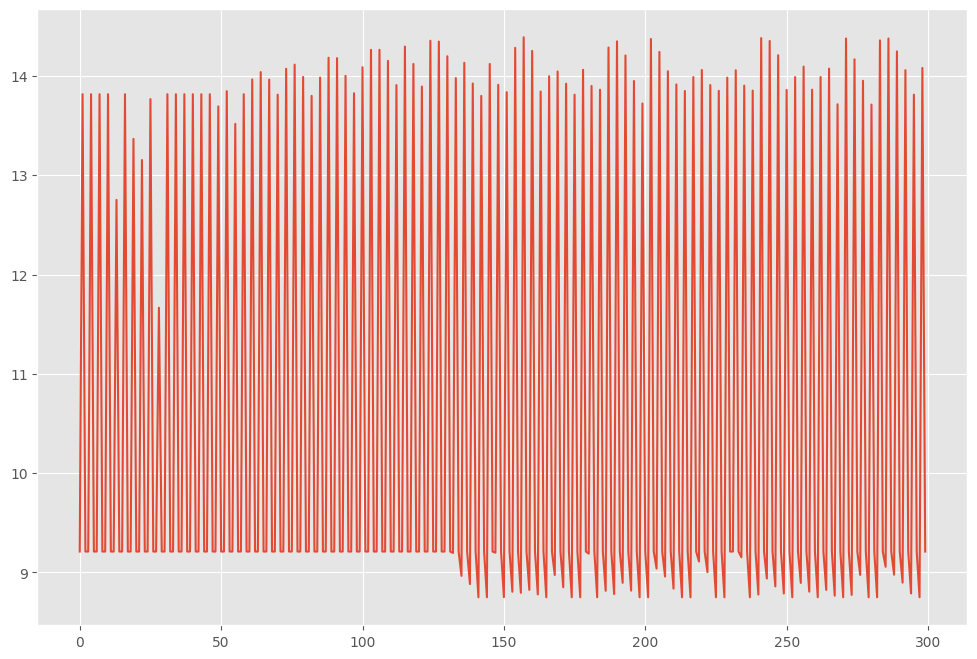

In [ ]:
alpha = 0.2
num_iters = 300
theta_final, cost_history = gradient_descent(x, y, theta, alpha, num_iters)
iterations = np.arange(len(cost_history))
plt.plot(cost_history)
plt.show()


### Task 9: Plotting the decision boundary
---

$h_\theta(x) = \sigma(z)$, where $\sigma$ is the logistic sigmoid function and $z = \theta^Tx$

When $h_\theta(x) \geq 0.5$ the model predicts class "1":

$\implies \sigma(\theta^Tx) \geq 0.5$

$\implies \theta^Tx \geq 0$ predict class "1"

Hence, $\theta_1 + \theta_2x_2 + \theta_3x_3 = 0$ is the equation for the decision boundary, giving us

$ x_3 = \frac{-(\theta_1+\theta_2x_2)}{\theta_3}$

In [ ]:
plt.scatter(x[:,1],x[:,2],c=y,cmap='coolwarm')
x1 = np.linspace(-3,3,6)
x2 = -(theta_final[0]+theta_final[1]*x1)/theta_final[2]
plt.plot(x1, x2, color='black')

InvalidIndexError: (slice(None, None, None), 1)

### Task 10: Predictions using the optimized $\theta$ values
---

$h_\theta(x) = x\theta$